<a href="https://colab.research.google.com/github/Mireu707/Capstone/blob/main/bicycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys, folium, pickle, matplotlib
sys.path.append('/content/drive/MyDrive/Colab Notebooks/capston')
from bicycle_utils import *
from folium import plugins
from datetime import datetime
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython import display
from base64 import b64decode
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import os.path as osp
import multiprocessing as mp
import os, datetime, matplotlib, holidays, shutil, time, csv, traceback, pickle, math, folium
from datetime import datetime
from itertools import product
from folium.features import DivIcon
from folium.map import Marker
import matplotlib.pyplot as plt
from utils import filter_nondigit, haversine_np

In [4]:
## filter corrupted rows of bicycle station location
#corrupted_rows, station_loc_df = filter_corrupted_station_loc_table(station_loc_raw_df)

In [ ]:
save_flag = False # save visualized result

In [ ]:
## load data file
new_user_age_df_raw = read_csv('/content/drive/MyDrive/Colab Notebooks/capston/data/공공자전거_월별_이용정보 2020_2022.csv')

/content/drive/MyDrive/Colab Notebooks/capston/data/공공자전거_월별_이용정보 2020_2022.csv 파일을 로딩합니다.


In [ ]:
new_user_age_df_raw.dtypes

대여일자        object
대여소번호        int64
대여소명        object
대여구분코드      object
성별          object
연령대코드       object
이용건수         int64
운동량         object
탄소량         object
이동거리(M)     object
이용시간(분)    float64
이용거리(M)    float64
이용시간(본)    float64
이동거리       float64
이용시간       float64
dtype: object

In [ ]:
new_user_age_df_raw.isna().sum()

대여일자             0
대여소번호            0
대여소명             0
대여구분코드           0
성별          631739
연령대코드            0
이용건수             0
운동량              0
탄소량              0
이동거리(M)     455644
이용시간(분)     455644
이용거리(M)    3527437
이용시간(본)    3527437
이동거리       3328619
이용시간       3328619
dtype: int64

In [ ]:
YEARS = ['2020', '2021', '2022']
MONTHS = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
ENG_MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def count_total_monthly_volume():
    count_list, record_date_list = [], []
    for year in YEARS:
        path = '/content/drive/MyDrive/Colab Notebooks/capston/data/공공자전거_월별_이용정보 2020_2022' + '.csv'
        df = read_csv(path, sep=',')
        if "'대여일자'" in df.columns:
            df.rename(columns = {"'대여일자'": "대여일자"}, inplace = True)
        if "'이용건수'" in df.columns:
            df.rename(columns = {"'이용건수'": "이용건수"}, inplace = True)
        print('Counting year {}'.format(year))

        ## 연도별 다른 포멧으로 공개된 데이터 파싱
        for i in range(len(MONTHS)):
            if year == '2022':
                if i > 13:
                    break
                year_month = '{}-{}'.format(year, MONTHS[i])
            elif year == '2021':
               year_month = '{}-{}'.format(year, MONTHS[i])
            elif year == '2020':
                year_month = '{}-{}'.format(year, MONTHS[i])
            count_list.append(df[df['대여일자'] == year_month]['이용건수'].sum())
            record_date_list.append(year + "-" + MONTHS[i])
    return count_list, record_date_list

def tabularize_total_monthly_volume(count_by_ten_hundreds_list, record_date_list):
    df = pd.DataFrame({'년-월': record_date_list, '이용자수(만명)': count_by_ten_hundreds_list})
    df['year'] = df['년-월'].apply(lambda x: x.split('-')[0])
    df['month'] = df['년-월'].apply(lambda x: x.split('-')[1])
    return df


count_list, record_date_list = count_total_monthly_volume()
count_by_ten_hundreds_list = [c / 1e4 for c in count_list] ## 가독성을 위해 만 단위로 나눔
total_monthly_volume_df = tabularize_total_monthly_volume(count_by_ten_hundreds_list, record_date_list)

/content/drive/MyDrive/Colab Notebooks/capston/data/공공자전거_월별_이용정보 2020_2022.csv 파일을 로딩합니다.
Counting year 2020
/content/drive/MyDrive/Colab Notebooks/capston/data/공공자전거_월별_이용정보 2020_2022.csv 파일을 로딩합니다.
Counting year 2021
/content/drive/MyDrive/Colab Notebooks/capston/data/공공자전거_월별_이용정보 2020_2022.csv 파일을 로딩합니다.
Counting year 2022


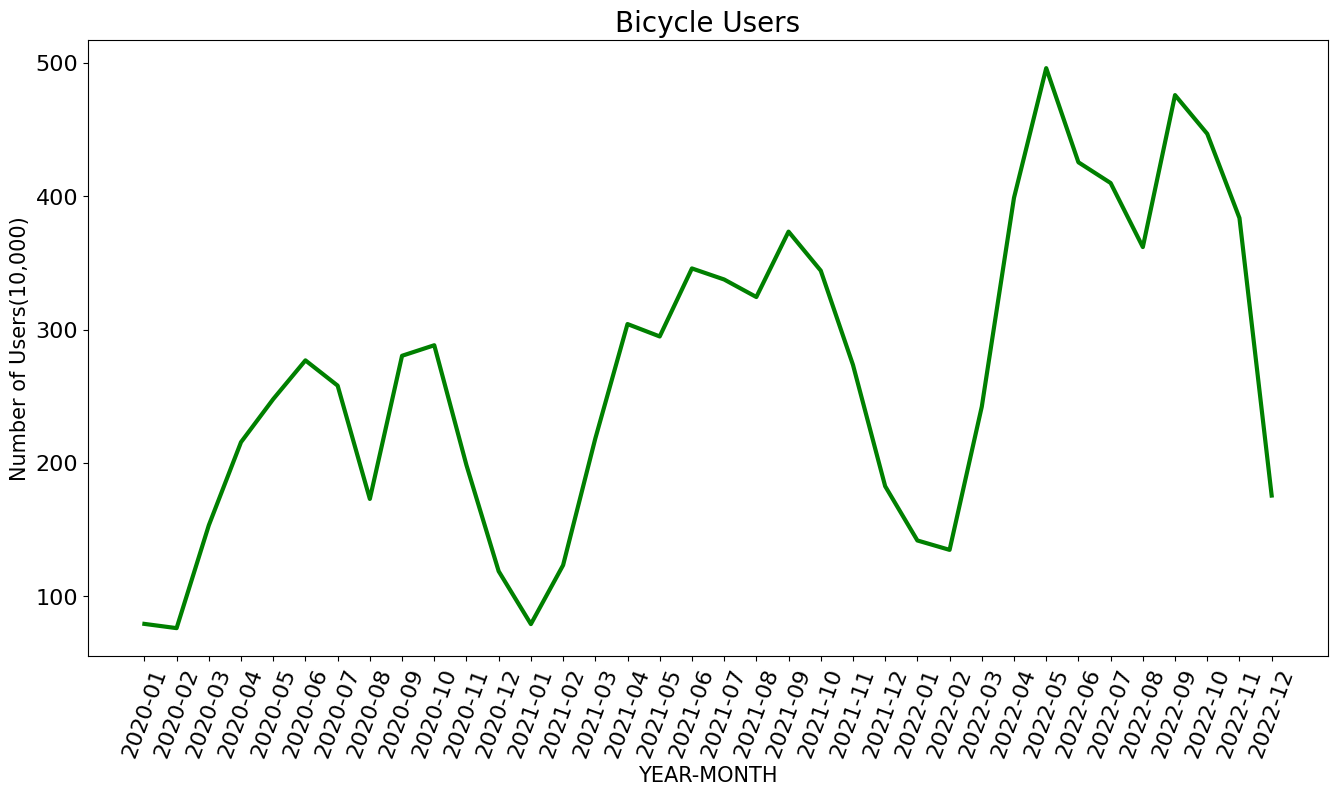

In [ ]:
plt.figure(figsize=(16, 8), facecolor='white')
plt.xlabel('YEAR-MONTH', fontsize=15)
plt.ylabel('Number of Users(10,000)', fontsize=15)
plt.xticks(fontsize = 16, rotation = 70)
plt.yticks(fontsize = 16)
plt.title('Bicycle Users', fontsize=20)
plt.plot(record_date_list, count_by_ten_hundreds_list, color = 'green', linewidth = 3)

plt.show()

2023-06 지역별 이용정보

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/capston/data/서울특별시 공공자전거 대여소별 이용정보(월별)_23.1-6 (2).csv'

# 'cp949'로 인코딩된 파일을 읽습니다
raw_data_for_bike_usage = pd.read_csv(file_path, encoding='cp949')

# 데이터를 정상적으로 읽었는지 확인
print(raw_data_for_bike_usage.head())

   자치구                            대여소명    기준년월   대여건수   반납건수
0  강남구                2301. 현대고등학교 건너편  202301   383    439 
1  강남구  2302. 교보타워 버스정류장(신논현역 3번출구 후면)  202301   433    446 
2  강남구                 2303. 논현역 10번출구  202301   648    508 
3  강남구                    2304. 대현그린타워  202301    76     55 
4  강남구              2305. MCM 본사 직영점 앞  202301   172    179 


In [ ]:
raw_data_for_bike_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     16306 non-null  object
 1   대여소명    16306 non-null  object
 2   기준년월    16306 non-null  int64 
 3   대여건수    16306 non-null  object
 4   반납건수    16306 non-null  object
dtypes: int64(1), object(4)
memory usage: 637.1+ KB


In [ ]:
# '대여건수' 열의 데이터 타입을 float64로 변환합니다
raw_data_for_bike_usage['대여건수'] = raw_data_for_bike_usage['대여건수'].str.replace(',', '').str.strip().astype(float)

# 기존 파일을 덮어쓰기 모드로 업데이트합니다
raw_data_for_bike_usage.to_csv('/content/drive/MyDrive/Colab Notebooks/capston/data/서울특별시 공공자전거 대여소별 이용정보(월별)_23.1-6.csv', index=False, mode='w')

In [ ]:
# 대여건수가 float64로 바뀐 것 확인
raw_data_for_bike_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   자치구     16306 non-null  object 
 1   대여소명    16306 non-null  object 
 2   기준년월    16306 non-null  int64  
 3   대여건수    16306 non-null  float64
 4   반납건수    16306 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 637.1+ KB


In [ ]:
# 지역별 대여량 분석 (2023년 6월)0
june_data_bike_usage = raw_data_for_bike_usage[raw_data_for_bike_usage['기준년월'] == 202306.0]
june_data_bike_usage_by_station = june_data_bike_usage.groupby('자치구').agg({'대여건수': 'sum'})
june_data_bike_usage_by_station['자치구'] = june_data_bike_usage_by_station.index
june_data_bike_usage_by_station.head(5)

,대여건수,자치구
자치구,,
강남구,148579.0,강남구
강동구,216373.0,강동구
강북구,74649.0,강북구
강서구,566170.0,강서구
관악구,126110.0,관악구


In [ ]:
# 2023-06 대여소별 이용정보 구조확인
june_data_bike_usage_by_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여건수    25 non-null     float64
 1   자치구     25 non-null     object 
dtypes: float64(1), object(1)
memory usage: 600.0+ bytes


In [ ]:
## top10 대여 건수 자치구
top10_station_usage = june_data_bike_usage_by_station.sort_values('대여건수', ascending=False).head(10)
top10_station_usage.index = np.arange(1, 11)
top10_station_usage['대여건수'] = top10_station_usage['대여건수'].astype(int)
top10_station_usage

,대여건수,자치구
1,566170,강서구
2,440150,송파구
3,400656,영등포구
4,294714,노원구
5,283613,양천구
6,235959,마포구
7,232465,광진구
8,216373,강동구
9,202502,구로구
10,185011,성동구


In [ ]:
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
bike_usage_by_station_map = folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)
folium.Choropleth(
 geo_data=state_geo,
    name='2023년 6월 자치구 별 따릉이 대여량',
    data=june_data_bike_usage_by_station,
    columns=('자치구', '대여건수'),
    key_on='feature.properties.name',
    fill_color='Greens',
    fill_opacity = 1,
    line_opacity = 1,
    color = 'black',
    legend_name = '대여량'
).add_to(bike_usage_by_station_map)
label_seoul_zones(bike_usage_by_station_map)

In [ ]:
if save_flag:
    bike_usage_by_station_map.save('3.2023년-6월-자치구별-대여량.html')
bike_usage_by_station_map

• 강서구와 송파구, 영등포구가 다른 자치구들과 큰 격차로 대여량 1,2, 3위를 차지함

• 대여소 분포와 비교해보았을 때, 대여량이 더 자치구별로 균등하지 못함

• 서초와 강남은 대여소 대비 대여량이 적은 것으로 나타남

2023 6월 기준 대여소 현황

In [ ]:
def read_station_loc_csv(station_loc_data_path, station_loc_filename='공공자전거 대여소 정보(23.06월 기준).csv'):
    station_loc_raw_df = pd.read_csv(osp.join(station_loc_data_path, station_loc_filename), encoding='utf-8')
    station_loc_raw_df = preprocess_station_loc_table(station_loc_raw_df)
    return station_loc_raw_df

bike_stations_june_raw = read_station_loc_csv('/content/drive/MyDrive/Colab Notebooks/capston/data/서울_공공자전거_대여소')
station_loc_raw_df = read_station_loc_csv('/content/drive/MyDrive/Colab Notebooks/capston/data/서울_공공자전거_대여소')

LCD 와 QR 거치대 모두 없는 대여소 개수: 0
자전거 대여소 위치 정보 데이터 전처리 완료
LCD 와 QR 거치대 모두 없는 대여소 개수: 0
자전거 대여소 위치 정보 데이터 전처리 완료


In [ ]:
## filter corrupted rows of bicycle station location
corrupted_rows, station_loc_df = filter_corrupted_station_loc_table(station_loc_raw_df)

Drop corrupted data rows - #rows 0


In [ ]:
bike_stations_june = bike_stations_june_raw.copy()
bike_stations_june

,대여소 번호,보관소(대여소)명,소재지(자치구),상세주소,위도,경도,설치 시기,운영 방식,거치대수
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,QR,40
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,QR,24
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07,QR,16
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015-01-07,QR,32
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,QR,22
...,...,...,...,...,...,...,...,...,...
2744,3699,상일파출소 옆,강동구,강동구 상일동 520-1,37.556553,127.165878,2022-06-21,QR,15
2745,3700,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.548164,127.122574,2022-07-08,QR,8
2746,3701,방아삼거리,강동구,강동구 둔촌동 118-2,37.523281,127.146133,2022-10-12,QR,8
2747,4951,강동농협 버스정류소 앞(광채빌라),강동구,강동구 암사동 488-21,37.547966,127.135162,2022-09-29,QR,5


In [ ]:
## LCD vs QR 대여소 지도 시각화
color_list = ['#e3cf0e', '#00a324']
bike_holder_map = folium.Map(location = [37.554648, 126.972559], zoom_start = 11, tiles = 'CartoDB positron')
for idx in bike_stations_june.index:
    lat = float(bike_stations_june.loc[idx, '위도'])
    lng = float(bike_stations_june.loc[idx, '경도'])
    r = float(bike_stations_june.loc[idx, '거치대수'])
    fillColor = color_list[0] if bike_stations_june.loc[idx, '운영 방식'] == 'LCD' else color_list[1]
    folium.CircleMarker([lat, lng], color = fillColor, fill_color = fillColor, radius = r/3, fill_opacity = 0.8, weight = 1).add_to(bike_holder_map)

In [ ]:
if save_flag:
    bike_holder_map.save('2.2023년-6월-자치구별-거치대수-bubble.html')
bike_holder_map

QR대여소와 LCD 대여소 고르게 분포되어 있음

In [ ]:
## 자치구별 대여소 개수
bike_stations_june_group_by_zone = bike_stations_june.groupby('소재지(자치구)').agg({'대여소 번호': 'count'})
bike_stations_june_group_by_zone['자치구'] = bike_stations_june_group_by_zone.index
bike_stations_june_group_by_zone.head(5)

,대여소 번호,자치구
소재지(자치구),,
강남구,171,강남구
강동구,122,강동구
강북구,61,강북구
강서구,189,강서구
관악구,79,관악구


In [ ]:
## 자치구별 대여소 지도 시각화
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
bike_holder_map_2 = folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)
folium.Choropleth(
    geo_data=state_geo,
    name='자치구 별 대여소 수',
    data=bike_stations_june_group_by_zone,
    columns=('자치구', '대여소 번호'),
    key_on='feature.properties.name',
    fill_color='Greens',
    fill_opacity = 1,
    line_opacity = 1,
    color = 'black',
    legend_name = '대여소 수'
).add_to(bike_holder_map_2)
label_seoul_zones(bike_holder_map_2)

In [ ]:
if save_flag:
    bike_holder_map_2.save('2.2023년-6월-자치구별-거치대수.html')
bike_holder_map_2

송파구, 강서구에 대여소가 밀집되어 있다.

도봉구, 강북구, 성북구, 동대문구, 광진구, 서대문구, 동작구, 관악구, 금천구가 다른 지역 대비 밀집도가 낮음.